<p style="font-size:20px">You may need to install <b>tqdm</b> and <b>cv2</b>. Simply do <b>conda install tqdm</b> and <b>conda install cv2</b> in your virtual environment. You are also free to use other tools to fetch the image files and resize them.</p>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np
import matplotlib.pyplot as plt
from random import shuffle
from tqdm import tqdm
import pickle
import os
import cv2
import timeit
import tensorflow as tf
import numpy as np
import pickle
import matplotlib.pyplot as plt
import timeit
import time

<p style="font-size:20px">In Problem 4a, you will preprocess the dogs and cats data and save them into "Pickle" files for later use.

In [0]:
train_dir = "drive/My Drive/train/"
test_dir = "drive/My Drive/test1/"

<p style="font-size:20px">Step 1: Kaggle does not provide a file that contains the labels. So we need to create labels from the training file.

In [0]:
"""
a function to return the label of a image
input: 
    image
return:
    if the image is cat, return [1,0]
    if the image is dog, return [0,1]
"""
def label_img(img):
    label = img[:3]
    if label == 'cat':
        return np.array([1,0])
    return np.array([0,1])

<p style="font-size:20px">Step 2: define a function to fetch all images from the training directory and return a <b>list</b> that every element contains two <b>Numpy array</b>:image and its label.

In [0]:
"""
Hint 1: use tqdm to fetch file
    for file in tqdm(os.listdir(directory)):
        ...

Hint 2: use cv2 to read file
    cv2.imread(path)

Hint 3: use cv2 to resize img
    cv2.resize(img, (size, size))
"""
def create_train_data(train_dir):
    data = []
    for fn in tqdm(os.listdir(train_dir)):
        label = label_img(fn)
        img = cv2.imread(os.path.join(train_dir, fn))
        img = cv2.resize(img, (227,227))
        data.append([img, label])
    shuffle(data)
    return data 
    

<p style="font-size:20px">Step 3: define a similar function to fetch all test data. You don't need to label them.

In [0]:
def create_test_data(test_dir):
    data = []
    for fn in tqdm(os.listdir(test_dir)):
        img = cv2.imread(os.path.join(test_dir, fn))
        img = cv2.resize(img, (227,227))
        data.append(img)
    shuffle(data)
    return data  

<p style="font-size:20px">Step 4: create your train and test data</p>

In [0]:
train_data = create_train_data(train_dir)

100%|██████████| 25000/25000 [2:14:32<00:00,  2.76it/s]


In [0]:
test_data = create_test_data(test_dir)

100%|██████████| 12500/12500 [1:17:20<00:00,  3.07it/s]


<p style="font-size:20px"> You can visualize the image using plt.imshow()

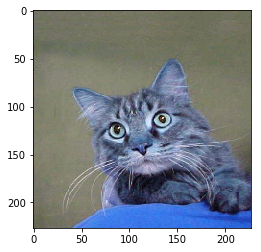

In [0]:
plt.imshow(train_data[0][0])

<p style="font-size:20px">Step 5: Reshape all images to have shape (#, 227, 227, 3). Use 500 training data as your validation set.

In [0]:
train_all_im = np.array([data[0] for data in train_data])
train_all_label = np.array([data[1] for data in train_data])
test_im = np.array(test_data)
val_im, train_im = train_all_im[:500], train_all_im[500:]
val_label, train_label = train_all_label[:500], train_all_label[500:]
print(train_im.shape)
print(val_im.shape)
print(test_im.shape)
print(train_label.shape)
print(val_label.shape)

(24500, 227, 227, 3)
(500, 227, 227, 3)
(12500, 227, 227, 3)
(24500, 2)
(500, 2)


<p style="font-size:20px">Step 6: Save training data, validation data and testing data as Pickle object</p>
<p style="font-size:20px">Note: You can't save all training data into one file because it has several Gigabytes. Separate your data wisely and save them into different files</p>

In [0]:
for i in range(5):
    with open('dogs-vs-cats-train-image-'+str(i)+'.pickle', 'wb') as f:
        if 5000*(i+1) > 24500:
            print(5000*i)
            pickle.dump(train_im[5000*i:], f)
        else:
            print(5000*i, 5000*(i+1))
            pickle.dump(train_im[5000*i:5000*(i+1)], f)
    with open('dogs-vs-cats-train-label-'+str(i)+'.pickle', 'wb') as f:
        if 5000*(i+1) > 24500:
            print(5000*i)
            pickle.dump(train_label[5000*i:], f)
        else:
            print(5000*i, 5000*(i+1))
            pickle.dump(train_label[5000*i:5000*(i+1)], f)
with open('dogs-vs-cats-val-image.pickle', 'wb') as f:
    pickle.dump(val_im, f)
with open('dogs-vs-cats-val-label.pickle', 'wb') as f:
    pickle.dump(val_label, f)
for i in range(3):
    with open('dogs-vs-cats-test-image-'+str(i)+'.pickle', 'wb') as f:
        if 5000*(i+1) > 12500:
            print(5000*i)
            pickle.dump(test_im[5000*i:], f)
        else:
            print(5000*i, 5000*(i+1))
            pickle.dump(test_im[5000*i:5000*(i+1)], f)

0 5000
0 5000
5000 10000
5000 10000
10000 15000
10000 15000
15000 20000
15000 20000
20000
20000
0 5000
5000 10000
10000


In [24]:
for i in range(5):
    with open('dogs-vs-cats-train-image-'+str(i)+'.pickle', 'rb') as f:
        tmp = pickle.load(f)
        try:
            train_image = np.concatenate((train_image, tmp))
        except:
            train_image = tmp
    with open('dogs-vs-cats-train-label-'+str(i)+'.pickle', 'rb') as f:
        tmp = pickle.load(f)
        try:
            train_label = np.concatenate((train_label, tmp))
        except:
            train_label = tmp
with open('dogs-vs-cats-val-image.pickle', 'rb') as f:
    val_image = pickle.load(f)
with open('dogs-vs-cats-val-label.pickle', 'rb') as f:
    val_label = pickle.load(f)
for i in range(3):
    with open('dogs-vs-cats-test-image-'+str(i)+'.pickle', 'rb') as f:
        tmp = pickle.load(f)
        try:
            test_image = np.concatenate((test_image, tmp))
        except:
            test_image = tmp
print(train_image.shape)
print(val_image.shape)
print(test_image.shape)
print(train_label.shape)
print(val_label.shape)

(24500, 227, 227, 3)
(500, 227, 227, 3)
(12500, 227, 227, 3)
(49000, 2)
(500, 2)


In [0]:
lr = 0.0001
epochs = 10
batch_size = 128
dropout = 0.5
num_classes = 2
W = 227
H = 227
channel = 3

In [0]:
tf.reset_default_graph()
X = tf.placeholder(tf.float32,[None, W, H, channel], name='X')
Y = tf.placeholder(tf.int32,[None, num_classes], name='Y')
training = tf.placeholder_with_default(False, shape=())

<h1>AlexNet</h1>

In [0]:
def AlexNet(x):
    conv1_out = tf.layers.conv2d(x, 96, 11, 4, 'valid', activation=tf.nn.relu)
    maxPool1_out = tf.contrib.layers.max_pool2d(conv1_out, 3, 2, 'VALID')
    out1 = tf.nn.lrn(maxPool1_out)
    
    conv2_out = tf.layers.conv2d(out1, 256, 5, 1, 'same', activation=tf.nn.relu)
    maxPool2_out = tf.contrib.layers.max_pool2d(conv2_out, 3, 2, 'VALID')
    out2 = tf.nn.lrn(maxPool2_out)

    out3 = tf.layers.conv2d(out2, 384, 3, 1, 'same', activation=tf.nn.relu)
    
    out4 = tf.layers.conv2d(out3, 384, 3, 1, 'same', activation=tf.nn.relu)
    
    out5 = tf.layers.conv2d(out4, 256, 3, 1, 'same', activation=tf.nn.relu)    
    maxPool5_out = tf.contrib.layers.max_pool2d(out5, 3, 2, 'VALID')
    
    layer5_drop = tf.layers.dropout(maxPool5_out, dropout,  training=training)
    layer5_reshape = tf.reshape(layer5_drop, shape=[-1, 256 * 6 * 6])
    fc1 = tf.layers.dense(layer5_reshape, 512, activation=tf.nn.relu, use_bias=True)
    fc1_drop = tf.layers.dropout(fc1, dropout,  training=training)
    fc2 =  tf.layers.dense(fc1, 512, activation=tf.nn.relu, use_bias=True)
    logits = tf.layers.dense(fc2, 2, activation=tf.nn.softmax, use_bias=True)
    
    return logits

In [30]:
logits = AlexNet(X)
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=lr)
train_op = optimizer.minimize(loss)

correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

Instructions for updating:
Use `tf.keras.layers.Conv2D` instead.
Instructions for updating:
Please use `layer.__call__` method instead.
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Use keras.layers.dropout instead.
Instructions for updating:
Use keras.layers.Dense instead.


In [0]:
def next_batch(batch_size, data, labels):
    idx = np.arange(0, data.shape[0])
    np.random.shuffle(idx)
    idx = idx[:batch_size]
    data_shuffle = [data[i] for i in idx]
    labels_shuffle = [labels[i] for i in idx]
    data_shuffle = np.asarray(data_shuffle)
    labels_shuffle = np.asarray(labels_shuffle)
    labels_shuffle = np.squeeze(labels_shuffle)
    return data_shuffle, labels_shuffle

In [32]:
init = tf.global_variables_initializer()

total_batch = int(24500 / batch_size)

with tf.Session() as sess:
    sess.run(init)
    time_start = time.time()
    for i in range(epochs):
        for j in range(total_batch):
            batch_x, batch_y = next_batch(batch_size, train_image, train_label)
            sess.run(train_op, feed_dict={X:batch_x, Y:batch_y, training:True})
        time_end = time.time()
        l, acc = sess.run([loss, accuracy],feed_dict={X:batch_x, Y:batch_y})
        acc_val = sess.run(accuracy,feed_dict={X:val_image, Y:val_label})
        print("epoch " + str(i+1) + ", loss: {:.4f}".format(l) + ", acc: {:.4f}".format(acc) + ", acc_val: {:.4f}".format(acc_val) + \
              ", time: {:.3f}\t".format(time_end-time_start))
        time_start = time.time()
    pred_test = sess.run(logits, feed_dict = {X: test_image[:10]})

epoch 1, loss: 0.5929, acc: 0.7109, acc_val: 0.6620, time: 71.851	
epoch 2, loss: 0.5483, acc: 0.7344, acc_val: 0.7280, time: 65.303	
epoch 3, loss: 0.5886, acc: 0.6875, acc_val: 0.7380, time: 65.563	
epoch 4, loss: 0.5581, acc: 0.7344, acc_val: 0.7880, time: 65.735	
epoch 5, loss: 0.4690, acc: 0.8281, acc_val: 0.8160, time: 65.575	
epoch 6, loss: 0.4543, acc: 0.8438, acc_val: 0.8360, time: 65.576	
epoch 7, loss: 0.4389, acc: 0.8906, acc_val: 0.8320, time: 65.750	
epoch 8, loss: 0.5204, acc: 0.7812, acc_val: 0.8120, time: 65.646	
epoch 9, loss: 0.4103, acc: 0.8984, acc_val: 0.8700, time: 65.822	
epoch 10, loss: 0.4256, acc: 0.8906, acc_val: 0.8640, time: 65.826	


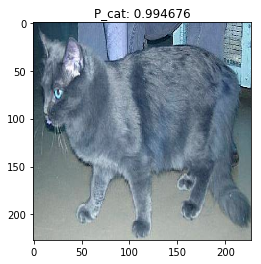

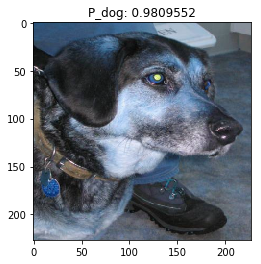

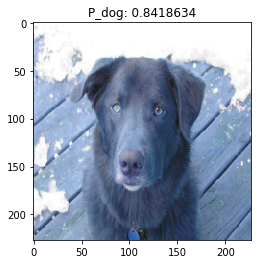

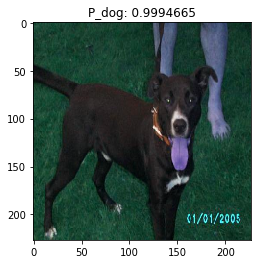

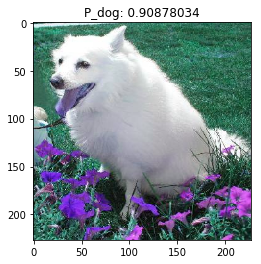

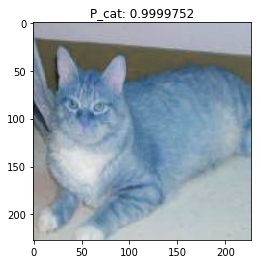

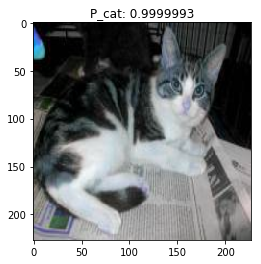

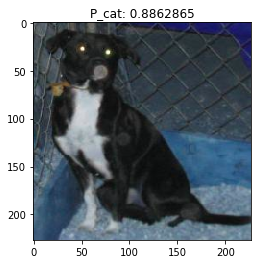

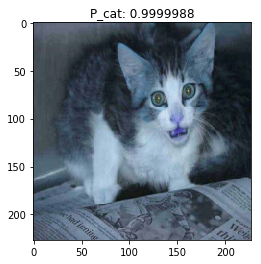

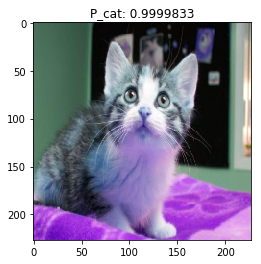

In [34]:
for i in range(10):
    pred = np.squeeze(pred_test[i])
    if pred[0] < pred[1]:
        result = "P_dog: "+str(pred[1])
    else:
        result = "P_cat: "+str(pred[0])
    fig = plt.figure()
    plt.imshow(np.squeeze(test_image[i]))
    plt.title(result)